##Imports



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow

#mohammad nabizade - December, 2022

##Here we define our histogram function

In [ ]:
def my_histogram(image, size):

	# We create an array of the required size that is filled with zeros
	myHisto = np.zeros(size)
	
	#loop around the image pixel by pixel
	for pixel in image:
		myHisto[pixel] += 1

	return (myHisto)

##In this function, we calculate the cumulative summation of the data of a list.

In [ ]:
def Cumulative(lists):
    cu_list = []
    length = len(lists)
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)]
    return cu_list[1:]

## importing the image

In [ ]:
img = cv2.imdecode(np.asarray(bytearray(urllib.request.urlopen('https://img-aws.ehowcdn.com/700x/www.onlyinyourstate.com/wp-content/uploads/2017/08/6056088006_f312dcd5af_b.jpg').read()), dtype=np.uint8), 0)
img = cv2.resize(img, (300,300))

raw image


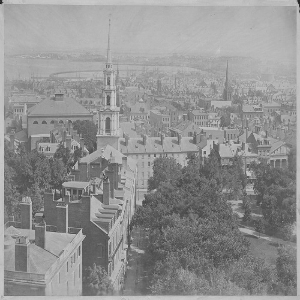

In [ ]:
print("raw image") 
cv2_imshow(img)

## We calculate the histogram of the input image

In [ ]:
org_img_hist = my_histogram(img, 256)

<ipython-input-7-5da4ec6707f5>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(org_img_hist)


Text(0.5, 1.0, 'Histogram')

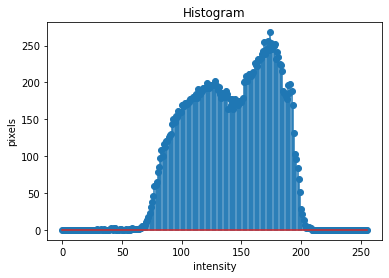

In [ ]:
# plotting the histogram
plt.legend
plt.stem(org_img_hist)
plt.xlabel('intensity')
plt.ylabel('pixels')
plt.title('Histogram')

## cumulative sum

In [ ]:
#We calculate the cumulative sum of the output of our histogram function
cdf = Cumulative(org_img_hist)
cdf = np.array(cdf)

In [ ]:
#the cumulative sum must be normalized to be usable 
cdfnmhist = (cdf - cdf.min())*256 / ( cdf.max() - cdf.min())

## we plot the graph of normalized cumulative sum on the histogram graph

<ipython-input-10-d84cccfd1655>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(org_img_hist)


Text(0.5, 1.0, 'Normal cdf + Histogram')

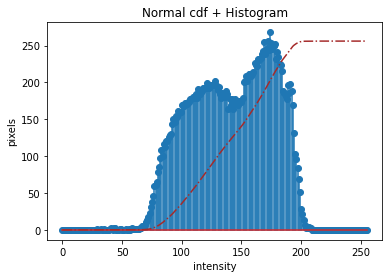

In [ ]:
plt.legend
plt.stem(org_img_hist)
plt.plot(cdfnmhist, linestyle = 'dashdot', color='brown')
plt.xlabel('intensity')
plt.ylabel('pixels')
plt.title('Normal cdf + Histogram')

## Here we acquire the value from the cumulative sum for every pixel in our image and set that as equalized image.  

In [ ]:
equalized_image = cdfnmhist[img]

In [ ]:
#The output can be presented as an array presentation, and the system recognizes it as an image when plotted, but we reshape it to make it similar to the first images.
equalized_image = np.reshape(equalized_image, img.shape); equalized_image = equalized_image.astype("uint8");

## Here we can compare the input image with the enhanced image 


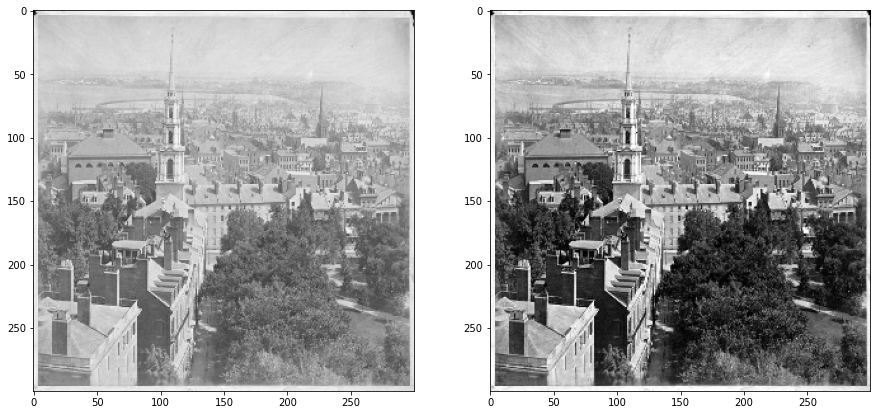

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,2,1)
plt.imshow(img,'gray')
fig.add_subplot(1,2,2)
plt.imshow(equalized_image,'gray')

In [ ]:
#Now we calculate the histogram of equalized image
newimghist = my_histogram(equalized_image, 256)

<ipython-input-15-62eb4a7d0da4>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(newimghist)


Text(0, 0.5, 'pixels')

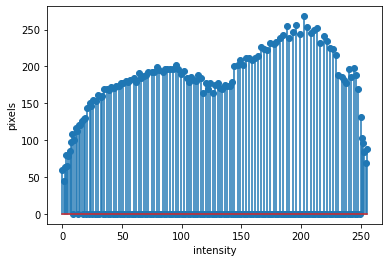

In [ ]:
plt.legend
plt.stem(newimghist)
plt.xlabel('intensity')
plt.ylabel('pixels')
##plt.title('Histogram of the equalized image')

<ipython-input-16-c069ac1b67ae>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.subplot(222), plt.stem(org_img_hist)
<ipython-input-16-c069ac1b67ae>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.subplot(224), plt.stem(newimghist)


(0.0, 256.0)

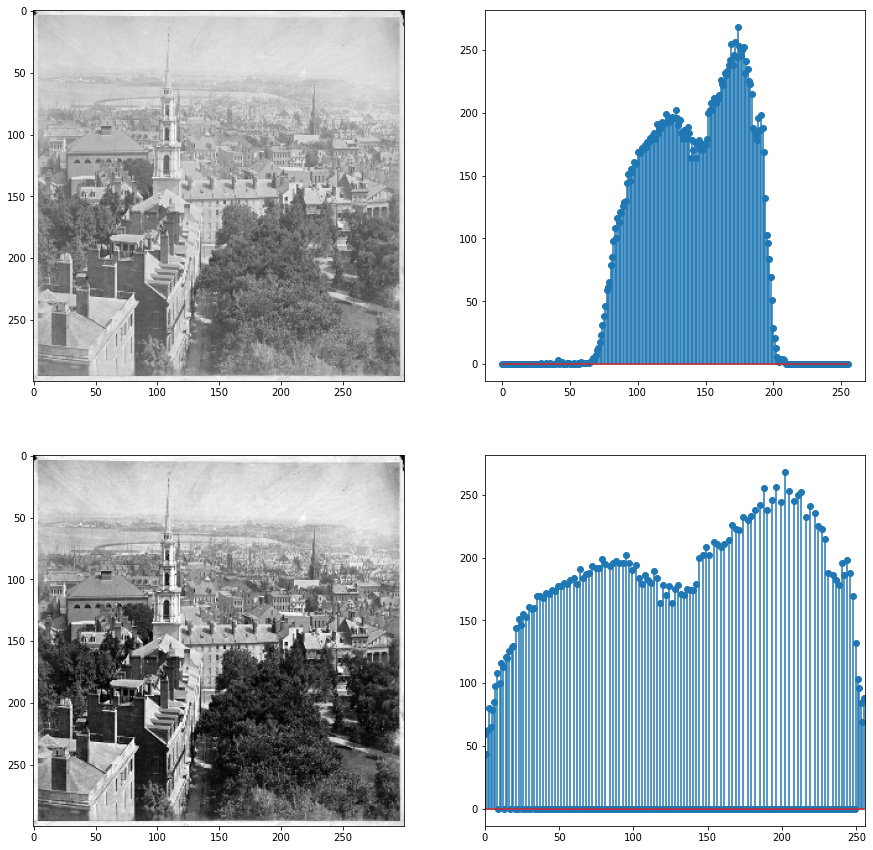

In [ ]:
#No we can compare all of our output with inputs
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.stem(org_img_hist)
plt.subplot(223), plt.imshow(equalized_image,'gray')
plt.subplot(224), plt.stem(newimghist)
plt.xlim([0,256])


## we will equalize 2 more images and compare their  histogram 

In [ ]:
img2 = cv2.imdecode(np.asarray(bytearray(urllib.request.urlopen('https://johnloomis.org/ece563/notes/enhancement/scale/pout.jpg').read()), dtype=np.uint8), 0)
img2 = cv2.resize(img2, (300,300))
img3 = cv2.imdecode(np.asarray(bytearray(urllib.request.urlopen('https://images.thestar.com/Kcl451LU09WtFphMWWj_ubIGrqY=/1086x679/smart/filters:cb(2700061000)/https://www.thestar.com/content/dam/thestar/calgary/2018/08/22/warning-issued-as-bc-fires-drag-calgarys-air-quality-back-to-risky-levels/smoke2.jpg').read()), dtype=np.uint8), 0)
#img3 = cv2.resize(img3, (300,300))

In [ ]:
org_img2_hist = my_histogram(img2, 256)
org_img3_hist = my_histogram(img3, 256)

In [ ]:
#We calculate the cumulative sum of the output of our histogram function for image 2 & 3
#img2
cdf2 = Cumulative(org_img2_hist)
cdf2 = np.array(cdf2)
#img3
cdf3 = Cumulative(org_img3_hist)
cdf3 = np.array(cdf3)
#the cumulative sum must be normalized to be usable 
#img2
cdfnmhist2 = (cdf2 - cdf2.min())*256 / ( cdf2.max() - cdf2.min())
#img3
cdfnmhist3 = (cdf3 - cdf3.min())*256 / ( cdf3.max() - cdf3.min())

In [ ]:
equalized_image2 = cdfnmhist2[img2]; equalized_image2 = np.reshape(equalized_image2, img2.shape); equalized_image2 = equalized_image2.astype("uint8");
newimghist2 = my_histogram(equalized_image2, 256)

equalized_image3 = cdfnmhist3[img3]; equalized_image3 = np.reshape(equalized_image3, img3.shape); equalized_image3 = equalized_image3.astype("uint8")
newimghist3 = my_histogram(equalized_image3, 256)


<ipython-input-21-1f26a6301028>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.subplot(222), plt.stem(org_img2_hist)
<ipython-input-21-1f26a6301028>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.subplot(224), plt.stem(newimghist2)


(0.0, 256.0)

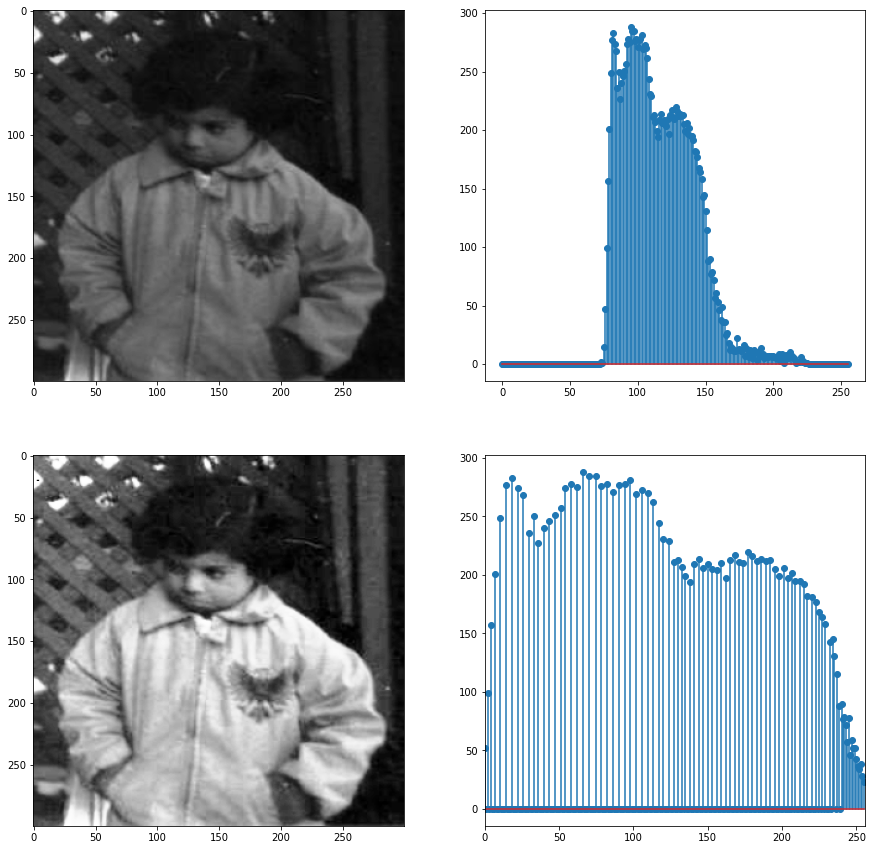

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(221), plt.imshow(img2,'gray')
plt.subplot(222), plt.stem(org_img2_hist)
plt.subplot(223), plt.imshow(equalized_image2,'gray')
plt.subplot(224), plt.stem(newimghist2)
plt.xlim([0,256])

<ipython-input-22-8834d75532f3>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.subplot(222), plt.stem(org_img3_hist)
<ipython-input-22-8834d75532f3>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.subplot(224), plt.stem(newimghist3)


(0.0, 256.0)

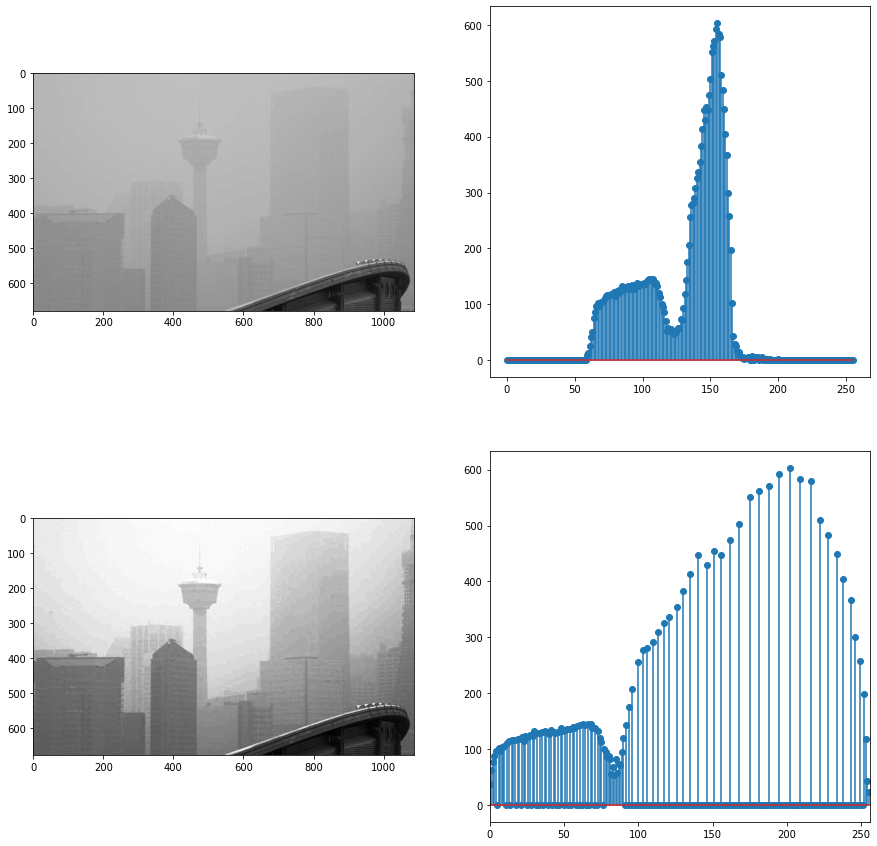

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(221), plt.imshow(img3,'gray')
plt.subplot(222), plt.stem(org_img3_hist)
plt.subplot(223), plt.imshow(equalized_image3,'gray')
plt.subplot(224), plt.stem(newimghist3)
plt.xlim([0,256])

🏁Done🏁